# Amazon Book Ratings - Initial Data Exploration

#### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Import Data

In [2]:
ratings = pd.read_csv('ratings_Books.csv', header=None, names=['user_id', 'product_id', 'rating', 'time'])

In [3]:
ratings.head()

,user_id,product_id,rating,time
0,AH2L9G3DQHHAJ,0000000116,4.0,1019865600
1,A2IIIDRK3PRRZY,0000000116,1.0,1395619200
2,A1TADCM7YWPQ8M,0000000868,4.0,1031702400
3,AWGH7V0BDOJKB,0000013714,4.0,1383177600
4,A3UTQPQPM4TQO0,0000013714,5.0,1374883200


In [4]:
n_ratings = len(ratings)
print('Number of ratings: {}'.format(n_ratings))

Number of ratings: 22507155


#### How many different users are there, and how many ratings have they given?

In [5]:
n_users = len(ratings.user_id.unique())
print('Number of unique users: {}'.format(n_users))

Number of unique users: 8026324


In [6]:
user_freq = ratings.user_id.value_counts() # number of ratings for each user_id
user_freq.head()

A14OJS0VWMOSWO    43201
AFVQZQ8PW0L       28816
A2F6N60Z96CAJI     6121
A320TMDV6KCFU      5955
A2OJW07GQRNJUT     5443
Name: user_id, dtype: int64

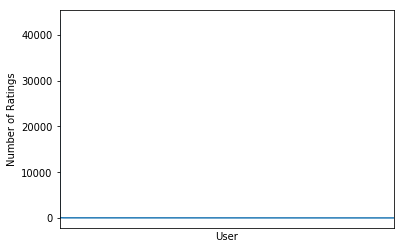

In [18]:
fig, ax = plt.subplots()
user_freq.plot(xticks=[])
ax.set_ylabel('Number of Ratings')
ax.set_xlabel('User')
plt.show()

As we can see, the vast majority of users have given very few ratings. Let's limit to only users with at least 15 ratings and no more than 10,000 so we can see better.

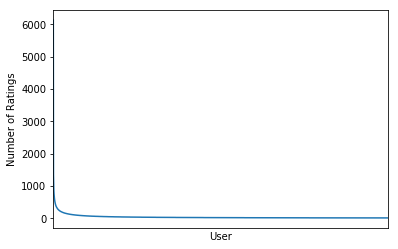

In [19]:
fig, ax = plt.subplots()
user_freq[user_freq > 14][user_freq < 10001].plot(xticks=[])
ax.set_ylabel('Number of Ratings')
ax.set_xlabel('User')
plt.show()

Alternatively, we can see the distribution as a boxplot.

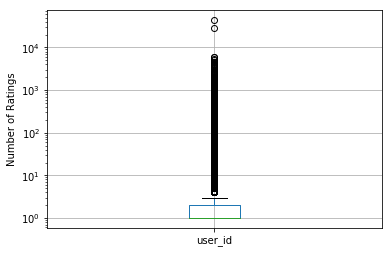

In [24]:
a = pd.DataFrame(user_freq).boxplot(return_type='axes')
a.set_yscale('log')
a.set_ylabel('Number of Ratings')
plt.show()

#### How many different items are there, and how many ratings do they have?

In [10]:
n_products = len(ratings.product_id.unique())
print('Number of unique items: {}'.format(n_products))

Number of unique items: 2330066


In [11]:
product_freq = ratings.product_id.value_counts()
product_freq.head()

0439023483    21398
030758836X    19867
0439023513    14114
0385537859    12973
0007444117    12629
Name: product_id, dtype: int64

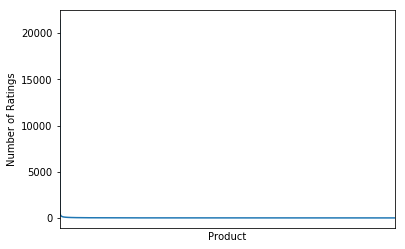

In [25]:
fig, ax = plt.subplots()
product_freq.plot(xticks=[])
ax.set_ylabel('Number of Ratings')
ax.set_xlabel('Product')
plt.show()

The same thing happens here... let's limit to items with 15-10000 ratings...

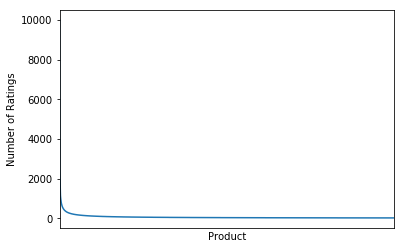

In [28]:
fig, ax = plt.subplots()
product_freq[product_freq > 14][product_freq < 10001].plot(xticks=[])
ax.set_ylabel('Number of Ratings')
ax.set_xlabel('Product')
plt.show()

... and view as a boxplot.

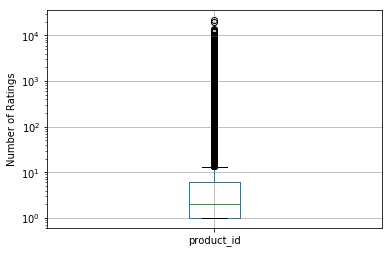

In [27]:
a = pd.DataFrame(product_freq).boxplot(return_type='axes')
a.set_yscale('log')
a.set_ylabel('Number of Ratings')
plt.show()

#### How sparse is the data?

In [15]:
sparsity = (n_ratings / (n_users * n_products)) * 100
print('Sparsity of ratings data: {0:.6f}%'.format(sparsity))

Sparsity of ratings data: 0.000120%
